In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import gc

from sklearn import set_config
from sklearn.base import clone
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
#from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import os
for dirname, _, filenames in os.walk('C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data\Times_Series_Project_uoc.xlsx


In [2]:
#!pip install xgboost

Data loading

In [27]:
PATH_FILE = 'C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data/Times_Series_Project_uoc.xlsx'

Others_Europe = pd.read_excel(PATH_FILE, 'Others_Europe')
Continental_Europe2 = pd.read_excel(PATH_FILE, 'Continental_Europe2')
Continental_Europe = pd.read_excel(PATH_FILE, 'Continental_Europe')
Latam = pd.read_excel(PATH_FILE, 'Latam')
Central_Europe = pd.read_excel(PATH_FILE, 'Central_Europe')
Asia = pd.read_excel(PATH_FILE, 'Asia')

Let's see some rows

In [28]:
Latam.head(10)

,date,sales_national,humidity_avg_Acapulco de Juarez,humidity_avg_Acayucan,humidity_avg_Apodaca,humidity_avg_Cancun,humidity_avg_Chihuahua,humidity_avg_Ciudad Nezahualcoyotl,humidity_avg_Cuautitlan,humidity_avg_Culiacan,...,pollution_Pachuca de Soto_no2,pollution_Pachuca de Soto_pm10,pollution_Pachuca de Soto_pm25,pollution_Pachuca de Soto_so2,pollution_Toluca_co,pollution_Toluca_no2,pollution_Toluca_o3,pollution_Toluca_pm10,pollution_Toluca_pm25,pollution_Toluca_so2
0,2020-01-06,1122.746421,77.107143,77.041667,63.565476,81.160714,51.678571,41.726190,41.726190,74.755952,...,4.728571,33.428571,49.571429,2.785714,7.642857,8.271429,15.400000,40.000000,34.250000,6.671429
1,2020-01-13,1085.718753,78.130952,81.839286,55.035714,77.172619,28.369048,37.797619,37.994048,70.928571,...,11.871429,38.857143,55.571429,3.128571,10.785714,19.442857,18.385714,60.285714,89.428571,6.342857
2,2020-01-20,1130.660106,73.583333,85.214286,75.065476,74.642857,41.309524,60.303571,60.386905,71.285714,...,9.900000,24.142857,40.000000,2.400000,9.485714,15.257143,16.571429,43.428571,75.714286,4.557143
3,2020-01-27,1084.862518,75.026656,82.612060,67.984472,76.387164,47.766304,51.901656,51.697723,74.104555,...,12.871429,26.714286,46.142857,2.814286,9.785714,14.600000,13.700000,40.285714,79.142857,4.928571
4,2020-02-03,1068.615971,71.455782,82.813776,56.789966,82.659014,37.722789,36.096939,36.096939,73.443878,...,12.014286,32.857143,50.428571,2.857143,9.842857,13.400000,17.142857,44.571429,70.142857,5.342857
5,2020-02-10,1097.741597,75.017857,81.101190,55.297619,75.226190,37.279762,40.047619,40.226190,74.488095,...,13.371429,31.857143,49.285714,3.114286,10.185714,12.985714,13.728571,36.000000,70.000000,5.657143
6,2020-02-17,1131.390868,72.357143,78.059524,72.220238,77.452381,32.720238,43.708333,43.708333,71.892857,...,13.285714,40.000000,56.428571,2.857143,11.142857,17.371429,16.057143,53.857143,91.571429,5.257143
7,2020-02-24,1120.130247,74.178571,82.339286,70.666667,76.815476,43.404762,36.809524,36.916667,68.684524,...,11.442857,39.857143,56.285714,3.128571,9.957143,15.785714,20.185714,57.571429,92.428571,4.785714
8,2020-03-02,1151.568334,74.827381,81.119048,39.392857,69.386905,22.000000,37.797619,37.946429,68.422619,...,12.071429,40.714286,57.857143,3.300000,10.128571,16.585714,19.271429,54.428571,88.428571,4.757143
9,2020-03-09,1202.353607,76.660714,73.416667,55.238095,72.285714,47.291667,41.315476,41.958333,67.375000,...,9.928571,37.428571,56.714286,2.800000,10.228571,16.700000,23.957143,58.571429,96.857143,5.185714


In [29]:
print('We have ', Central_Europe.shape[0], ' rows and ', Central_Europe.shape[1], 'columns in the Central_Europe Dataset.')
print('We have ', Others_Europe.shape[0], ' rows and ', Others_Europe.shape[1], 'columns in the Others_Europe Dataset.')
print('We have ', Continental_Europe.shape[0], ' rows and ', Continental_Europe.shape[1], 'columns in the Continental_Europe Dataset.')
print('We have ', Continental_Europe2.shape[0], ' rows and ', Continental_Europe2.shape[1], 'columns in the Continental_Europe2 Dataset.')
print('We have ', Latam.shape[0], ' rows and ', Latam.shape[1], 'columns in the Latam Dataset.')
print('We have ', Asia.shape[0], ' rows and ', Asia.shape[1], 'columns in the Asia Dataset.')

We have  174  rows and  150 columns in the Central_Europe Dataset.
We have  183  rows and  66 columns in the Others_Europe Dataset.
We have  186  rows and  34 columns in the Continental_Europe Dataset.
We have  186  rows and  132 columns in the Continental_Europe2 Dataset.
We have  189  rows and  111 columns in the Latam Dataset.
We have  174  rows and  221 columns in the Asia Dataset.


Let's see number on NAs by column in the numerical ones

In [30]:
na_count = Latam.isna().sum()

columns_with_na = na_count[na_count > 0]

print(columns_with_na)

Series([], dtype: int64)


We can see we have no NAs

Histogram of: sales_national 



<AxesSubplot:>

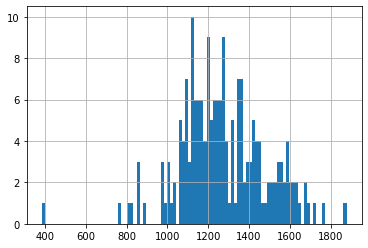

Histogram of: humidity_avg_Acapulco de Juarez 



<AxesSubplot:>

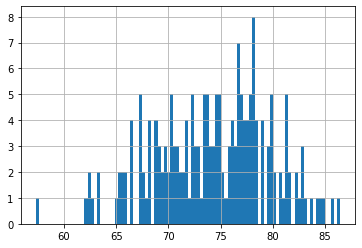

Histogram of: humidity_avg_Acayucan 



<AxesSubplot:>

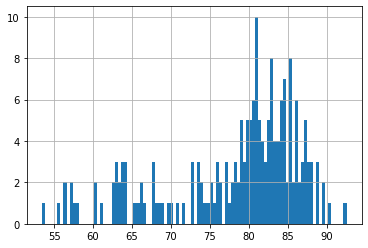

Histogram of: humidity_avg_Apodaca 



<AxesSubplot:>

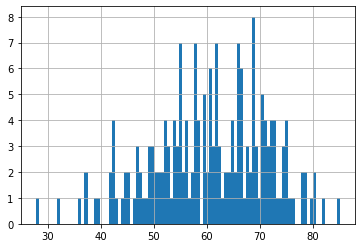

Histogram of: humidity_avg_Cancun 



<AxesSubplot:>

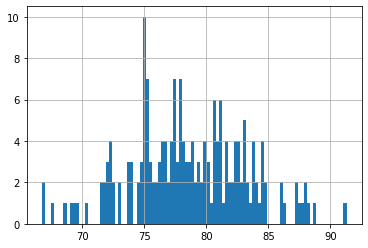

Histogram of: humidity_avg_Chihuahua 



<AxesSubplot:>

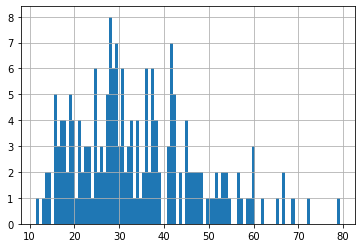

Histogram of: humidity_avg_Ciudad Nezahualcoyotl 



<AxesSubplot:>

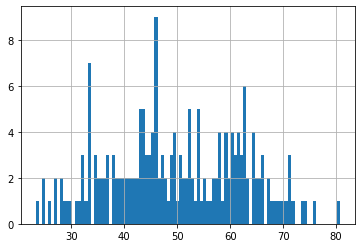

Histogram of: humidity_avg_Cuautitlan 



<AxesSubplot:>

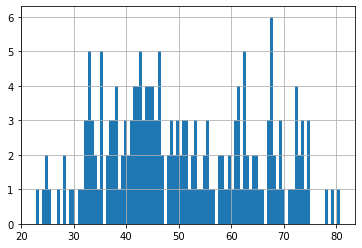

Histogram of: humidity_avg_Culiacan 



<AxesSubplot:>

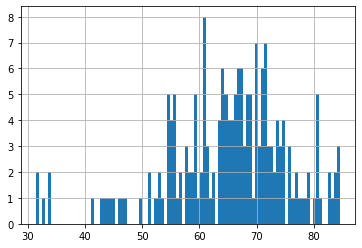

Histogram of: humidity_avg_Durango 



<AxesSubplot:>

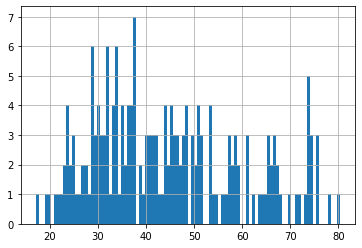

Histogram of: humidity_avg_Ecatepec 



<AxesSubplot:>

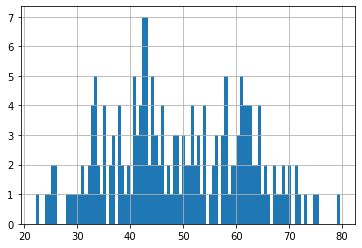

Histogram of: humidity_avg_Guadalajara 



<AxesSubplot:>

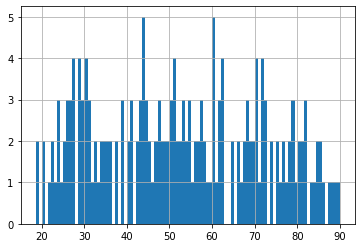

Histogram of: humidity_avg_Guadalupe 



<AxesSubplot:>

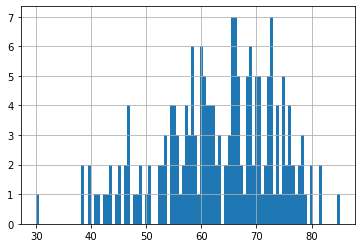

Histogram of: humidity_avg_Hermosillo 



<AxesSubplot:>

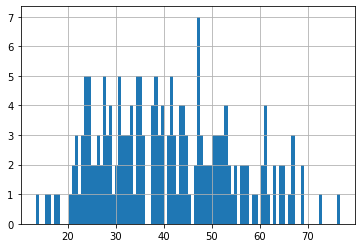

Histogram of: humidity_avg_Heroica Matamoros 



<AxesSubplot:>

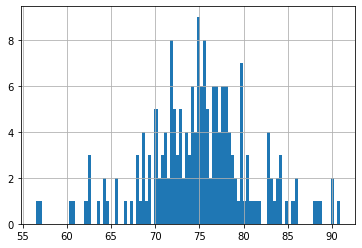

Histogram of: humidity_avg_Leon 



<AxesSubplot:>

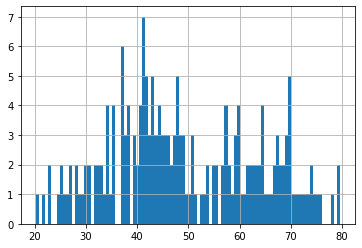

Histogram of: humidity_avg_Mexicali 



<AxesSubplot:>

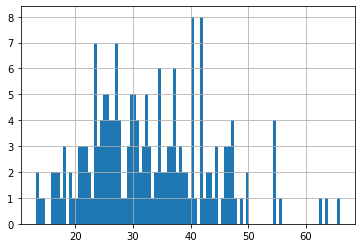

Histogram of: humidity_avg_Mexico City 



<AxesSubplot:>

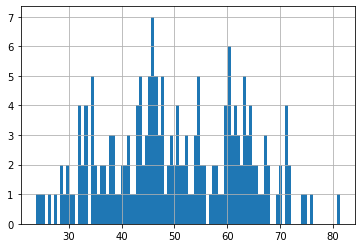

Histogram of: humidity_avg_Monterrey 



<AxesSubplot:>

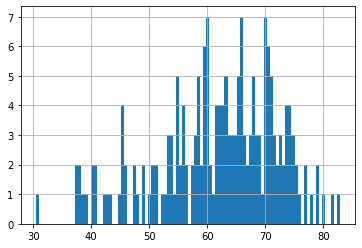

Histogram of: humidity_avg_Morelia 



<AxesSubplot:>

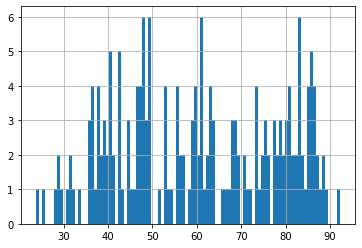

Histogram of: humidity_avg_Naucalpan de Juarez 



<AxesSubplot:>

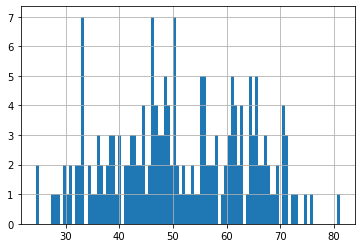

Histogram of: humidity_avg_Puebla 



<AxesSubplot:>

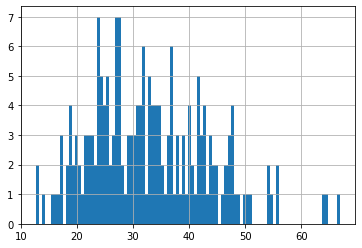

Histogram of: humidity_avg_Puebla de Zaragoza 



<AxesSubplot:>

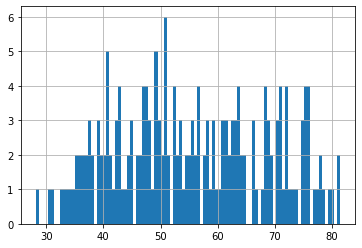

Histogram of: humidity_avg_Reynosa 



<AxesSubplot:>

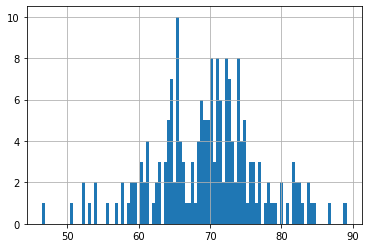

Histogram of: humidity_avg_Saltillo 



<AxesSubplot:>

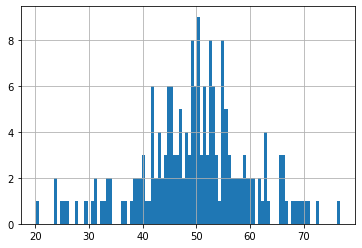

Histogram of: humidity_avg_San Luis Potosi 



<AxesSubplot:>

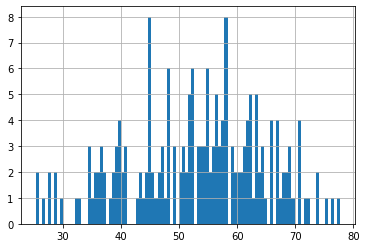

Histogram of: humidity_avg_Tijuana 



<AxesSubplot:>

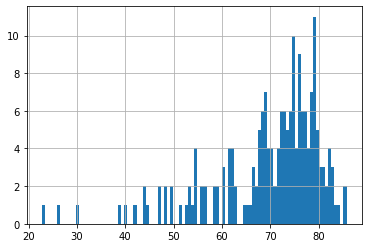

Histogram of: humidity_avg_Tlalnepantla 



<AxesSubplot:>

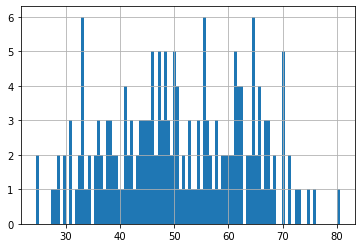

Histogram of: humidity_avg_Tlaquepaque 



<AxesSubplot:>

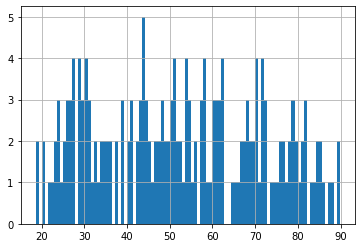

Histogram of: humidity_avg_Toluca 



<AxesSubplot:>

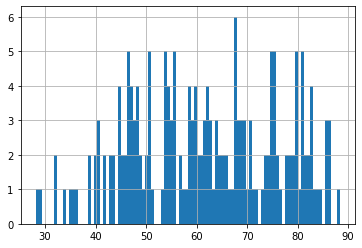

Histogram of: humidity_avg_Tuxtla Gutierrez 



<AxesSubplot:>

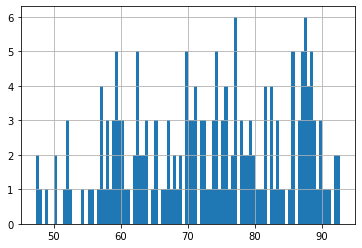

Histogram of: humidity_avg_Valladolid 



<AxesSubplot:>

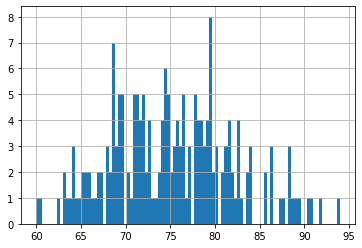

Histogram of: humidity_avg_Zapopan 



<AxesSubplot:>

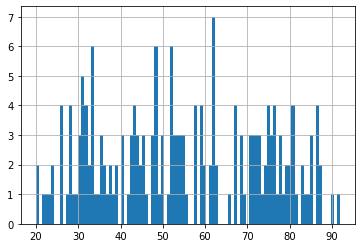

Histogram of: temp_avg_k_Acapulco de Juarez 



<AxesSubplot:>

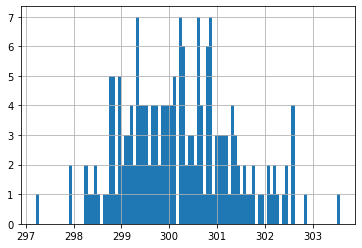

Histogram of: temp_avg_k_Acayucan 



<AxesSubplot:>

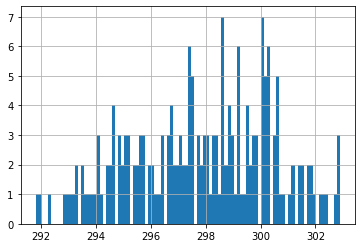

Histogram of: temp_avg_k_Apodaca 



<AxesSubplot:>

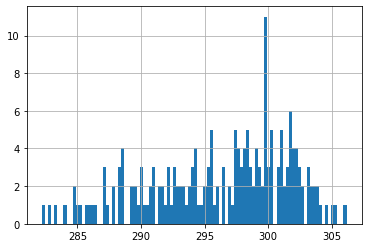

Histogram of: temp_avg_k_Cancun 



<AxesSubplot:>

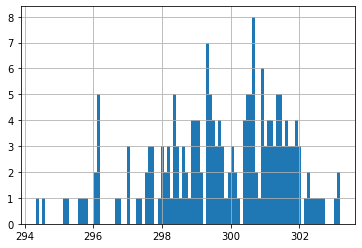

Histogram of: temp_avg_k_Chihuahua 



<AxesSubplot:>

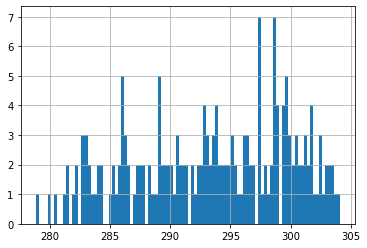

Histogram of: temp_avg_k_Ciudad Nezahualcoyotl 



<AxesSubplot:>

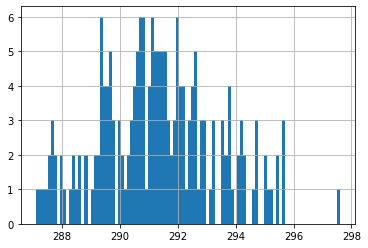

Histogram of: temp_avg_k_Cuautitlan 



<AxesSubplot:>

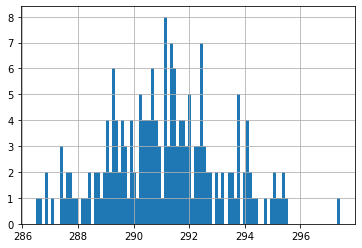

Histogram of: temp_avg_k_Culiacan 



<AxesSubplot:>

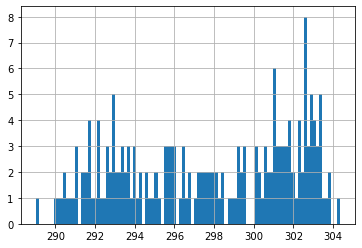

Histogram of: temp_avg_k_Durango 



<AxesSubplot:>

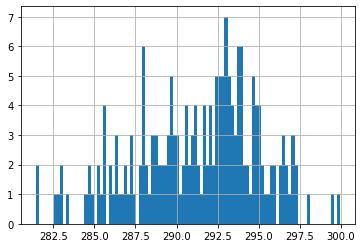

Histogram of: temp_avg_k_Ecatepec 



<AxesSubplot:>

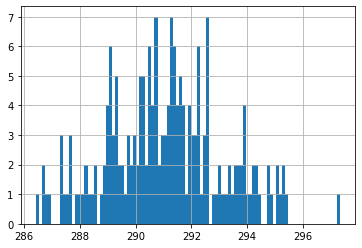

Histogram of: temp_avg_k_Guadalajara 



<AxesSubplot:>

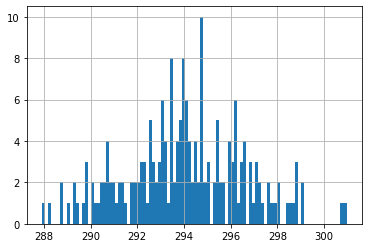

Histogram of: temp_avg_k_Guadalupe 



<AxesSubplot:>

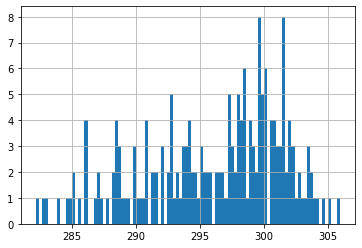

Histogram of: temp_avg_k_Hermosillo 



<AxesSubplot:>

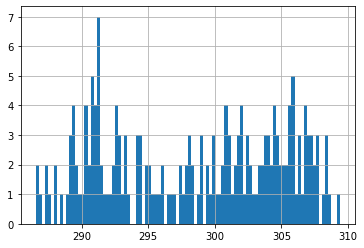

Histogram of: temp_avg_k_Heroica Matamoros 



<AxesSubplot:>

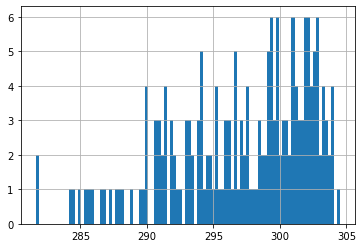

Histogram of: temp_avg_k_Leon 



<AxesSubplot:>

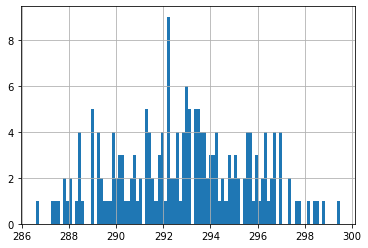

Histogram of: temp_avg_k_Mexicali 



<AxesSubplot:>

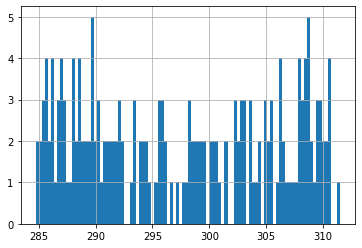

Histogram of: temp_avg_k_Mexico City 



<AxesSubplot:>

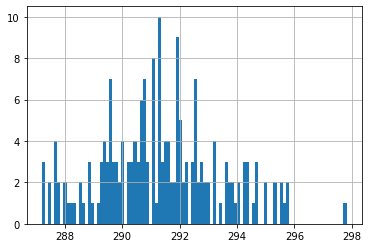

Histogram of: temp_avg_k_Monterrey 



<AxesSubplot:>

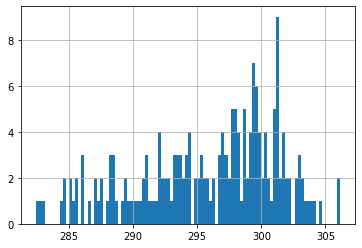

Histogram of: temp_avg_k_Morelia 



<AxesSubplot:>

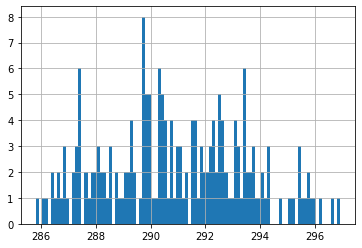

Histogram of: temp_avg_k_Naucalpan de Juarez 



<AxesSubplot:>

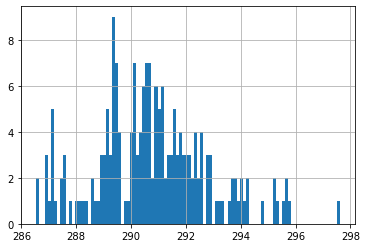

Histogram of: temp_avg_k_Puebla 



<AxesSubplot:>

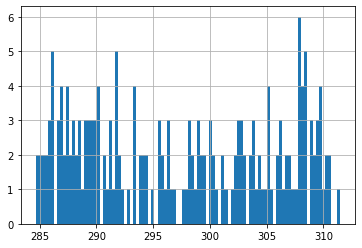

Histogram of: temp_avg_k_Puebla de Zaragoza 



<AxesSubplot:>

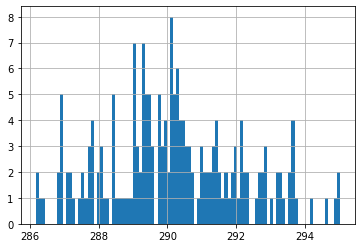

Histogram of: temp_avg_k_Reynosa 



<AxesSubplot:>

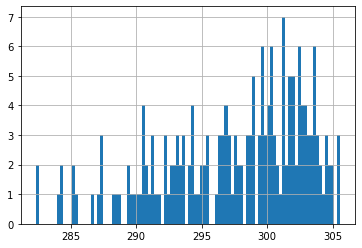

Histogram of: temp_avg_k_Saltillo 



<AxesSubplot:>

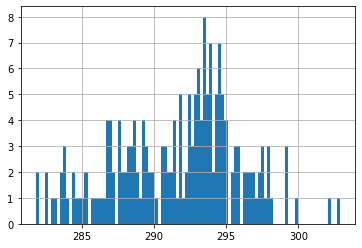

Histogram of: temp_avg_k_San Luis Potosi 



<AxesSubplot:>

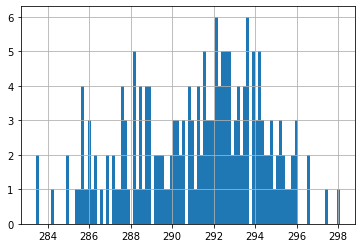

Histogram of: temp_avg_k_Tijuana 



<AxesSubplot:>

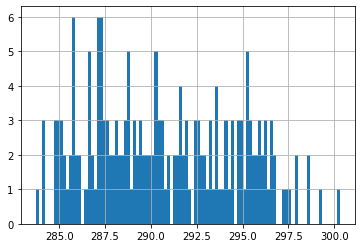

Histogram of: temp_avg_k_Tlalnepantla 



<AxesSubplot:>

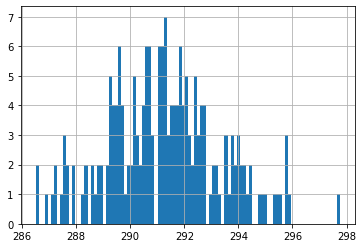

Histogram of: temp_avg_k_Tlaquepaque 



<AxesSubplot:>

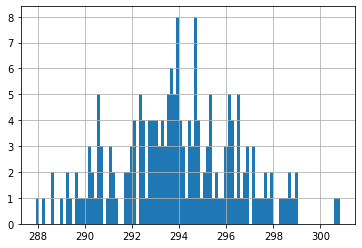

Histogram of: temp_avg_k_Toluca 



<AxesSubplot:>

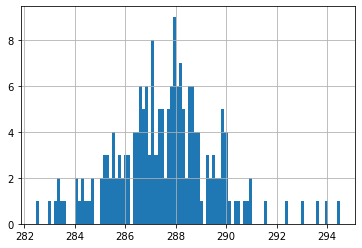

Histogram of: temp_avg_k_Tuxtla Gutierrez 



<AxesSubplot:>

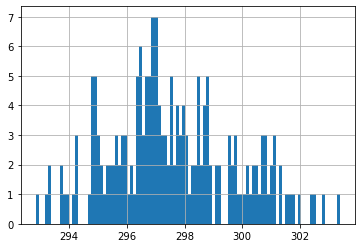

Histogram of: temp_avg_k_Valladolid 



<AxesSubplot:>

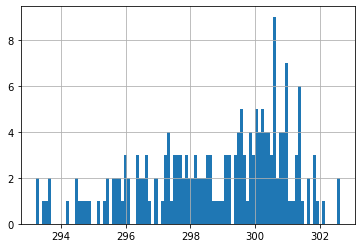

Histogram of: temp_avg_k_Zapopan 



<AxesSubplot:>

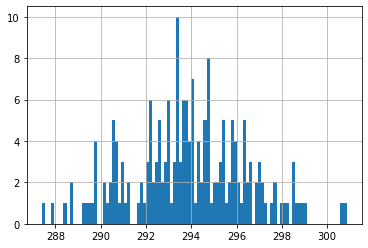

Histogram of: gtrends_MX_Diarrea 



<AxesSubplot:>

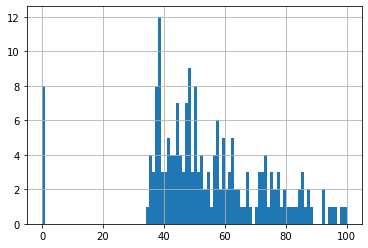

Histogram of: gtrends_MX_Enterogermina 



<AxesSubplot:>

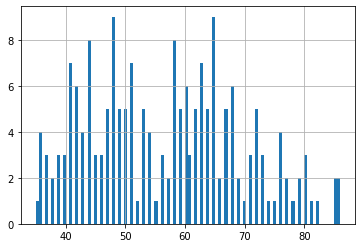

Histogram of: gtrends_MX_Probioticos 



<AxesSubplot:>

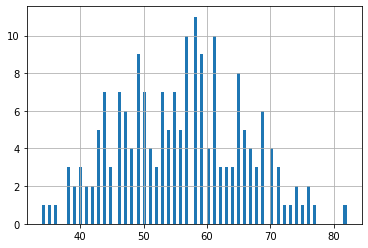

Histogram of: gtrends_MX-HID_Diarrea 



<AxesSubplot:>

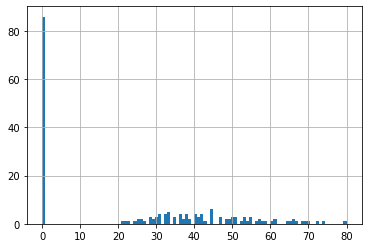

Histogram of: gtrends_MX-HID_Enterogermina 



<AxesSubplot:>

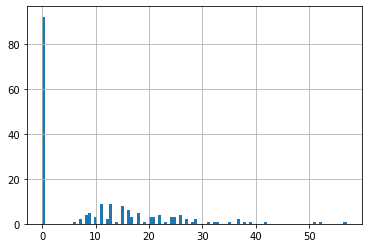

Histogram of: gtrends_MX-HID_Probioticos 



<AxesSubplot:>

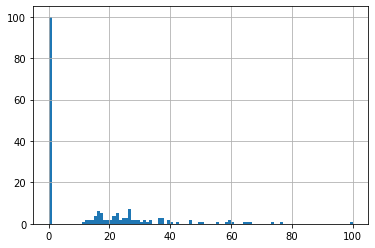

Histogram of: gtrends_MX-MEX_Diarrea 



<AxesSubplot:>

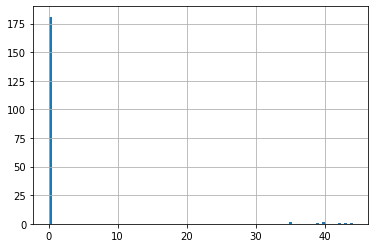

Histogram of: gtrends_MX-MEX_Enterogermina 



<AxesSubplot:>

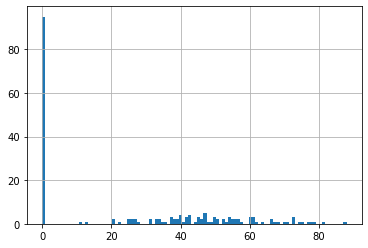

Histogram of: gtrends_MX-MEX_Probioticos 



<AxesSubplot:>

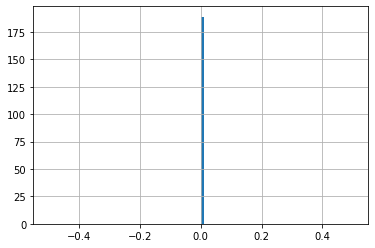

Histogram of: gtrends_MX-MOR_Diarrea 



<AxesSubplot:>

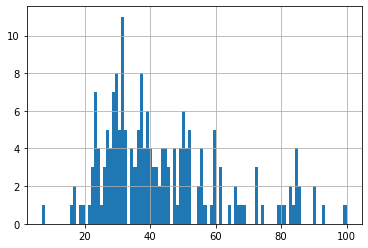

Histogram of: gtrends_MX-MOR_Enterogermina 



<AxesSubplot:>

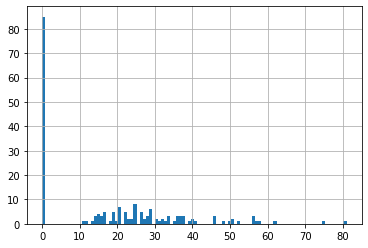

Histogram of: gtrends_MX-MOR_Probioticos 



<AxesSubplot:>

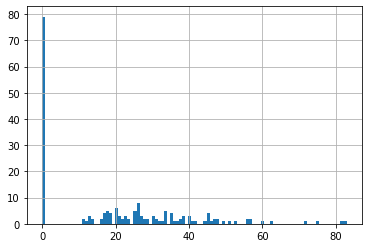

Histogram of: gtrends_MX-PUE_Diarrea 



<AxesSubplot:>

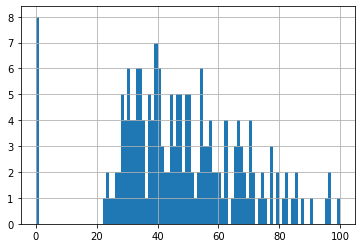

Histogram of: gtrends_MX-PUE_Enterogermina 



<AxesSubplot:>

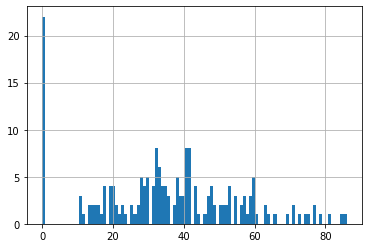

Histogram of: gtrends_MX-PUE_Probioticos 



<AxesSubplot:>

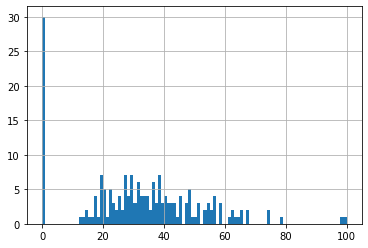

Histogram of: gtrends_MX-QUE_Diarrea 



<AxesSubplot:>

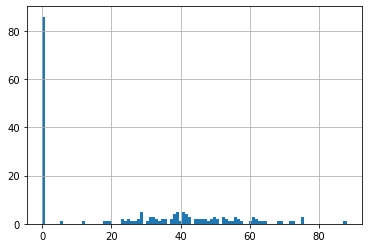

Histogram of: gtrends_MX-QUE_Enterogermina 



<AxesSubplot:>

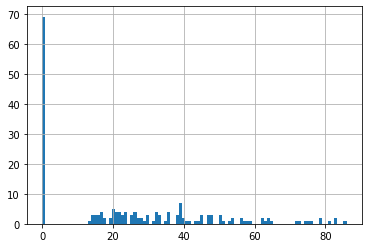

Histogram of: gtrends_MX-QUE_Probioticos 



<AxesSubplot:>

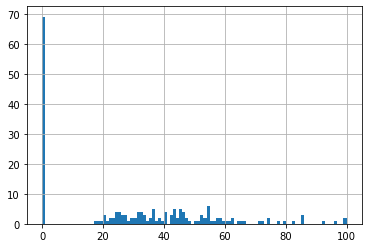

Histogram of: gtrends_MX-TLA_Diarrea 



<AxesSubplot:>

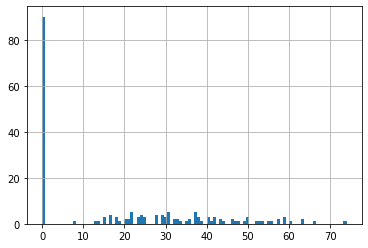

Histogram of: gtrends_MX-TLA_Enterogermina 



<AxesSubplot:>

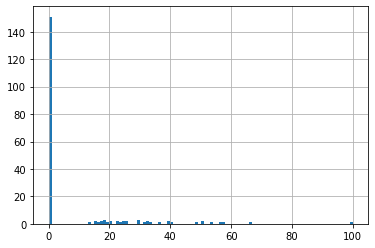

Histogram of: gtrends_MX-TLA_Probioticos 



<AxesSubplot:>

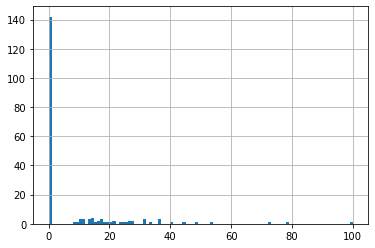

Histogram of: influenza 



<AxesSubplot:>

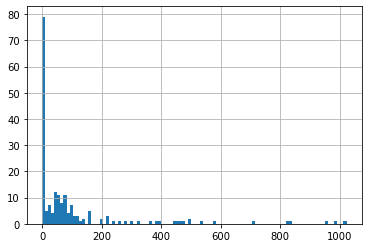

Histogram of: pollution_Guadalajara_o3 



<AxesSubplot:>

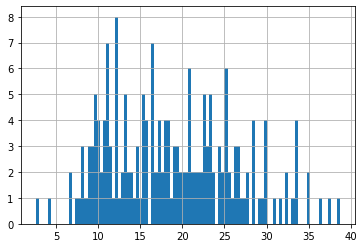

Histogram of: pollution_Guadalajara_pm10 



<AxesSubplot:>

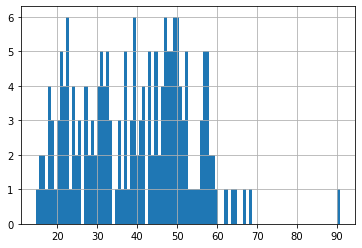

Histogram of: pollution_Guadalajara_so2 



<AxesSubplot:>

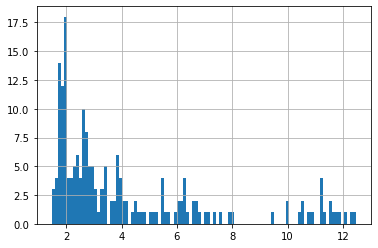

Histogram of: pollution_Mexico City_co 



<AxesSubplot:>

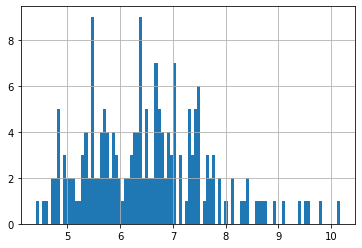

Histogram of: pollution_Mexico City_no2 



<AxesSubplot:>

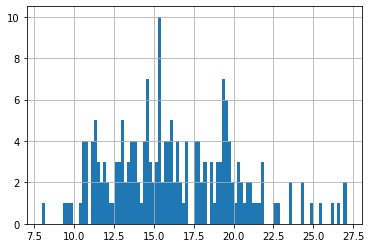

Histogram of: pollution_Mexico City_o3 



<AxesSubplot:>

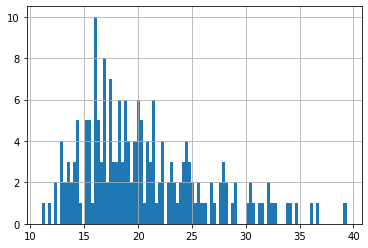

Histogram of: pollution_Mexico City_pm10 



<AxesSubplot:>

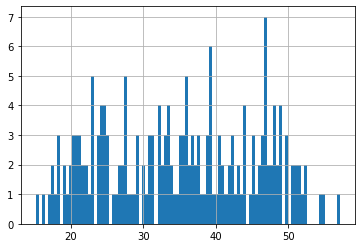

Histogram of: pollution_Mexico City_pm25 



<AxesSubplot:>

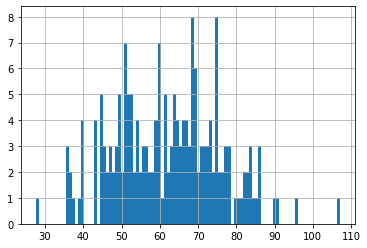

Histogram of: pollution_Mexico City_so2 



<AxesSubplot:>

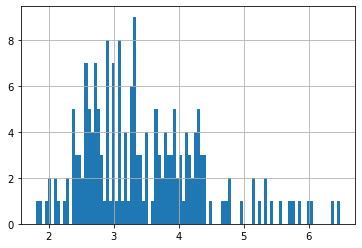

Histogram of: pollution_Morelia_humidity 



<AxesSubplot:>

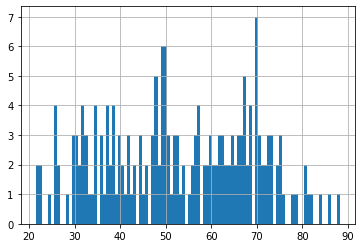

Histogram of: pollution_Morelia_pm10 



<AxesSubplot:>

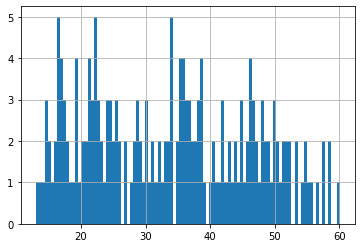

Histogram of: pollution_Morelia_pressure 



<AxesSubplot:>

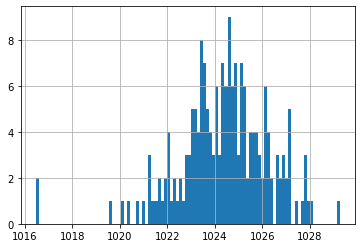

Histogram of: pollution_Morelia_temperature 



<AxesSubplot:>

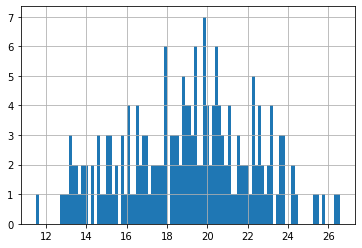

Histogram of: pollution_Pachuca de Soto_no2 



<AxesSubplot:>

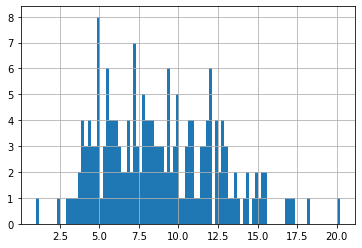

Histogram of: pollution_Pachuca de Soto_pm10 



<AxesSubplot:>

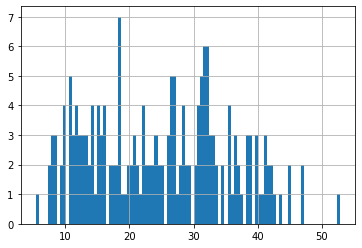

Histogram of: pollution_Pachuca de Soto_pm25 



<AxesSubplot:>

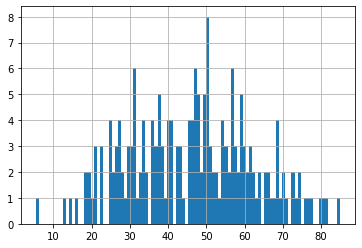

Histogram of: pollution_Pachuca de Soto_so2 



<AxesSubplot:>

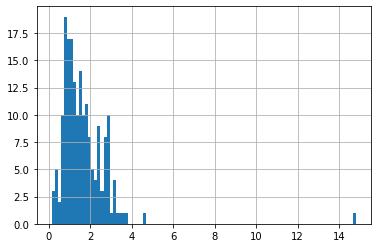

Histogram of: pollution_Toluca_co 



<AxesSubplot:>

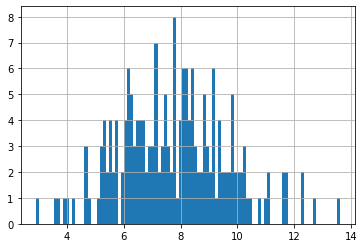

Histogram of: pollution_Toluca_no2 



<AxesSubplot:>

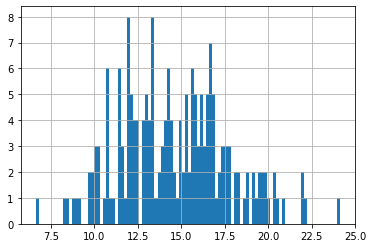

Histogram of: pollution_Toluca_o3 



<AxesSubplot:>

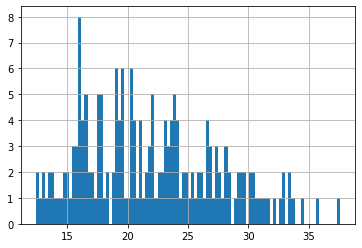

Histogram of: pollution_Toluca_pm10 



<AxesSubplot:>

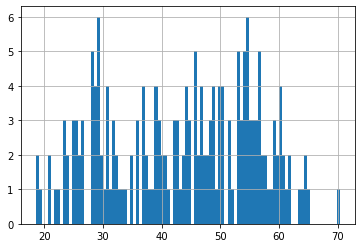

Histogram of: pollution_Toluca_pm25 



<AxesSubplot:>

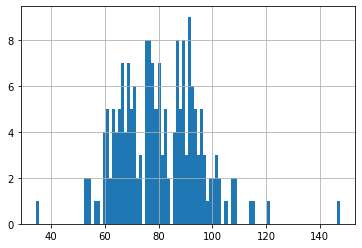

Histogram of: pollution_Toluca_so2 



<AxesSubplot:>

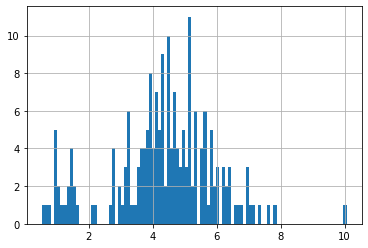

In [31]:
cols_vars = list(Latam.columns)[1:]


for col in cols_vars:
    print('Histogram of:', col, '\n')
    display(Latam[col].hist(bins=100))
    plt.show()

### Now we see correlation between variables, if the correlation is close to 1 or -1 we could think about dropping one variable.

<AxesSubplot:>

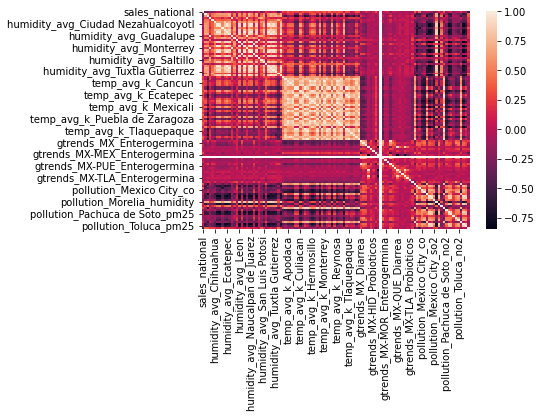

In [32]:
# calculate the correlation matrix on the numeric columns
corr = Latam[cols_vars].corr()

# plot the heatmap
sns.heatmap(corr)

In [42]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(Latam.iloc[:,1:], 10))

Top Absolute Correlations
humidity_avg_Guadalajara            humidity_avg_Tlaquepaque     0.999991
temp_avg_k_Mexicali                 temp_avg_k_Puebla            0.999709
temp_avg_k_Guadalajara              temp_avg_k_Tlaquepaque       0.999612
temp_avg_k_Ciudad Nezahualcoyotl    temp_avg_k_Mexico City       0.999123
temp_avg_k_Cuautitlan               temp_avg_k_Ecatepec          0.999107
temp_avg_k_Guadalupe                temp_avg_k_Monterrey         0.998907
temp_avg_k_Apodaca                  temp_avg_k_Guadalupe         0.998836
humidity_avg_Naucalpan de Juarez    humidity_avg_Tlalnepantla    0.998438
temp_avg_k_Guadalajara              temp_avg_k_Zapopan           0.998205
humidity_avg_Ciudad Nezahualcoyotl  humidity_avg_Mexico City     0.998015
dtype: float64


## Random Forest

In [9]:
X = Central_Europe.drop(['date', 'sales_A', 'sales_B', 'sales_C', 
                         'sales_D', 'sales_F', 'sales_G', 
                         'sales_H', 'sales_I', 'sales_J', 'sales_K', 'sales_M', 'sales_L'], axis=1)  # Ajusta 'variable_objetivo' al nombre de tu variable objetivo
y = Central_Europe['sales_A']

X = X.fillna(9999999)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de Random Forest para regresión
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrena el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcula la métrica de rendimiento (en este caso, el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo de Random Forest: {mse:.2f}")

Error Cuadrático Medio del modelo de Random Forest: 23137.12


In [10]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: 0.86
R² Ajustado: 1.05


## LGBM

In [11]:
# Crea un modelo de LightGBM para regresión
lgb_model = lgb.LGBMRegressor(n_estimators=300, random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrena el modelo en el conjunto de entrenamiento
lgb_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = lgb_model.predict(X_test)

# Calcula la métrica de rendimiento (en este caso, el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo de LightGBM: {mse:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5136
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 137
[LightGBM] [Info] Start training from score 736.430294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [12]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: 0.85
R² Ajustado: 1.05


## XGBoost

In [13]:
# Crea un modelo de XGBoost para regresión
xgb_model = xgb.XGBRegressor(n_estimators=300, random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrena el modelo en el conjunto de entrenamiento
xgb_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcula la métrica de rendimiento (en este caso, el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo de XGBoost: {mse:.2f}")

Error Cuadrático Medio del modelo de XGBoost: 17250.28


In [14]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: 0.90
R² Ajustado: 1.03


## SVR

In [19]:
# Crear un modelo de Support Vector Regressor (SVR)
svr = SVR(kernel='poly')  # Se puede elegir el tipo de kernel apropiado para tu problema

# Entrenar el modelo con los datos de entrenamiento
svr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svr.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo SVR: {mse:.2f}")

Error Cuadrático Medio del modelo SVR: 167841.62


In [16]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: -0.01
R² Ajustado: 1.33


## Lasso

In [22]:
# Crear un modelo de Lasso Regression
lasso = Lasso(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Entrenar el modelo con los datos de entrenamiento
lasso.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lasso.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo Lasso: {mse:.2f}")

Error Cuadrático Medio del modelo Lasso: 175841.81


C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.877e+06, tolerance: 1.877e+03
  model = cd_fast.enet_coordinate_descent(


In [23]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: -0.05
R² Ajustado: 1.35


## Ridge

In [24]:
# Crear un modelo de Regresión Ridge
ridge = Ridge(alpha=1.0)  # Puedes ajustar el hiperparámetro alpha según sea necesario

# Entrenar el modelo con los datos de entrenamiento
ridge.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo Ridge: {mse:.2f}")

Error Cuadrático Medio del modelo Ridge: 84942.95


C:\Users\tomas\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.29068e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [25]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: 0.49
R² Ajustado: 1.17
